# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы. 

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [1]:
import pandas as pd
import numpy as np

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
df = pd.read_csv('data.csv', dtype={'Platform' : 'category'}) # ^⨀ᴥ⨀^
df.head()

,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach
0,1,harrislisa,TikTok,54217,3,0.0986,538.10,0.0490,1308
1,2,rhicks,LinkedIn,987518,5,0.0834,479.24,0.0174,13302
2,3,qthomas,Facebook,218870,3,0.1020,150.36,0.0318,11043
3,4,carlosholt,Instagram,207432,6,0.0834,932.62,0.0400,12074
4,5,parsonsashley,Facebook,350204,2,0.0642,504.44,0.0463,14083


In [30]:
df = pd.read_csv("data.csv")

#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [3]:
df['Platform_Code'], unique_values = pd.factorize(df['Platform'])
float(df.corr(method='spearman', numeric_only=True)['Platform_Code']['Engagement Rate'])

0.03138169529349812

Вывод: значение корреляции между платформой и уровнем вовлеченности близко к нулю, что означает отсутсвие значимой зависимости между признаками.

#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [4]:
df['Follower_Bin'] = pd.qcut(df['Follower Count'], [0., .25, .5, .75, 1.], labels=["Low", "Medium", "High", "Very High"])
print(df.groupby('Follower_Bin', observed=False)['Engagement Rate'].mean()['High'])

0.08655032


#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря, 

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в 

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждого уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [24]:
melted_df = pd.melt(df, id_vars=['Account ID', 'Platform'], value_vars=['Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate', 'Campaign Reach'], var_name='Metric', value_name='Value').sort_values('Account ID').reset_index(drop=True)
print(melted_df.groupby(by=['Platform', 'Metric'], observed=False)['Value'].agg(lambda x: x.mode().max()).sum())

3100285.4716


#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [6]:
followers = df.sort_values(by='Follower Count', ascending=False).groupby('Platform', observed=False).head(3).reset_index(drop=True)
print(followers['Follower Count'].min())
followers

997512


,Account ID,Username,Platform,Follower Count,Posts Per Week,Engagement Rate,Ad Spend (USD),Conversion Rate,Campaign Reach,Platform_Code,Follower_Bin
0,2404,eric65,Facebook,999982,6,0.0642,884.06,0.0281,17312,2,Very High
1,4921,teresaellis,Twitter,999919,6,0.0834,411.63,0.0460,3975,4,Very High
2,5839,edwardthomas,TikTok,999739,7,0.0642,630.77,0.0325,35523,0,Very High
3,8686,alexandersamuel,Instagram,999726,3,0.0834,687.61,0.0205,11050,3,Very High
4,9685,sriley,Twitter,999442,3,0.0834,206.84,0.0225,12783,4,Very High
5,3966,lrodgers,Instagram,999351,1,0.0834,565.07,0.0335,12391,3,Very High
6,4235,andradewesley,TikTok,999234,5,0.0834,872.77,0.0481,17188,0,Very High
7,3040,toneill,LinkedIn,999055,4,0.0642,799.49,0.0174,21862,1,Very High
8,6360,andrewgregory,LinkedIn,998968,7,0.1020,797.64,0.0351,15552,1,Very High
9,2160,ashleycooper,LinkedIn,998925,6,0.0856,474.46,0.0156,45956,1,Very High


#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низка конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией. 

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [7]:
df['Conversion_Category'] = np.where(df['Conversion Rate'] > df['Conversion Rate'].median(), 'High', 'Low')
df['Conversion_Category'] = df['Conversion_Category'].astype('category')

pivot_table = pd.pivot_table(df, 
                             values=['Follower Count', 'Campaign Reach'], 
                             index='Platform', 
                             columns='Conversion_Category', 
                             aggfunc='sum', 
                             fill_value=0,
                             observed=False)
pivot_table['Conversion Influence'] = ((pivot_table['Follower Count', 'High'] - pivot_table['Follower Count', 'Low']) / 
                                        (pivot_table['Campaign Reach', 'High'] + pivot_table['Campaign Reach', 'Low']))

pivot_table[pivot_table['Conversion Influence'] == pivot_table['Conversion Influence'].max()]
print(pivot_table['Conversion Influence'].idxmax(), pivot_table['Conversion Influence'].max())

Twitter 1.0908724546727178


#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете. 

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает. 

Теперь для каждого окна посчитайте 

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимально значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективность и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [8]:
df_sorted = df.sort_values(by=['Platform', 'Posts Per Week'], ascending=[True, False])

df_sorted['Rolling Sum Reach'] = df_sorted.groupby('Platform', observed=False)['Campaign Reach'].rolling(window=3).sum().reset_index(level=0, drop=True)
df_sorted['Rolling Sum Spend'] = df_sorted.groupby('Platform', observed=False)['Ad Spend (USD)'].rolling(window=3).sum().reset_index(level=0, drop=True)
df_sorted['Rolling Efficiency Ratio'] = df_sorted['Rolling Sum Reach'] / df_sorted['Rolling Sum Spend']

rers_platforms = df_sorted.groupby('Platform', observed=False)['Rolling Efficiency Ratio'].max()

print(f'Наибольшая эффективность: {rers_platforms.idxmax()}\nНаименьшая эффективность: {rers_platforms.idxmin()}')


Наибольшая эффективность: Facebook
Наименьшая эффективность: TikTok


#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одно строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [9]:
subset_engagement = df.loc[df.groupby('Platform', observed=False)['Engagement Rate'].idxmax()]
subset_conversion = df.loc[df.groupby('Platform', observed=False)['Conversion Rate'].idxmax()]

merged = pd.merge(subset_engagement[['Platform', 'Username']], subset_conversion[['Platform', 'Username']], on='Platform', suffixes=(' (top of Engagement)', ' (top of Conversion)'))
print(merged[merged['Username (top of Engagement)'] == merged['Username (top of Conversion)']].shape[0])

0


#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [26]:
import time
execution_times_task8 = []
execution_times_task9 = []
# измерим время нескольких запусков, чтобы сравнить

In [29]:
%%time
start_time8 = time.perf_counter()
#---------------------------------------------------------

followers_sums_low = df[df['Conversion Rate'] <= df['Conversion Rate'].mean()][['Platform', 'Follower Count']].groupby('Platform', observed=False).sum()
followers_sums_high = df[df['Conversion Rate'] > df['Conversion Rate'].mean()][['Platform', 'Follower Count']].groupby('Platform', observed=False).sum()

followers_sums = followers_sums_low.merge(followers_sums_high, on='Platform', suffixes=[' (low)', ' (high)'])
followers_sums['high / low'] = followers_sums['Follower Count (high)'] / followers_sums['Follower Count (low)']

print(
f'''Максимальное значение: {followers_sums['high / low'].max()}, Платформа: {followers_sums['high / low'].idxmax()}
Минимальное значение: {followers_sums['high / low'].min()}, Платформа: {followers_sums['high / low'].idxmin()}
Разность: {followers_sums['high / low'].max() - followers_sums['high / low'].min()}
{30 * '-'}'''
)
#---------------------------------------------------------
end_time8 = time.perf_counter()
time_diff8 = end_time8 - start_time8
execution_times_task8.append(time_diff8 * 1000)
print(f'time = {time_diff8 * 1000} ms')

Максимальное значение: 1.0368734301945974, Платформа: Twitter
Минимальное значение: 0.8599860168074398, Платформа: Instagram
Разность: 0.17688741338715763
------------------------------
time = 7.29845801834017 ms
CPU times: user 6.75 ms, sys: 3.16 ms, total: 9.9 ms
Wall time: 7.4 ms


#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [21]:
%%time
dict_data = df.to_dict() 
'''наверное несправедливо замерять время работы вместе с преобразованием данных, 
так как в прошлом задании работать с данными можно было без преобразования'''

CPU times: user 27.8 ms, sys: 3.58 ms, total: 31.4 ms
Wall time: 30.5 ms


'наверное несправедливо замерять время работы вместе с преобразованием данных, \nтак как в прошлом задании работать с данными можно было без преобразования'

In [65]:
%%time
start_time9 = time.perf_counter()
#---------------------------------------------------------
conver_rate_mean = sum(dict_data['Conversion Rate'].values()) / len(dict_data['Conversion Rate'].values())

fsl = dict.fromkeys(set(dict_data['Platform'].values()), 0) #followers_sums_low
fsh = dict.fromkeys(set(dict_data['Platform'].values()), 0) #followers_sums_high

for i in range(0, len(dict_data['Account ID'])):
    if dict_data['Conversion Rate'][i] > conver_rate_mean:
        fsh[dict_data['Platform'][i]] += dict_data['Follower Count'][i]
    else:
        fsl[dict_data['Platform'][i]] += dict_data['Follower Count'][i]

fs = {key: fsh[key] / fsl[key] for key in fsh.keys() & fsl}
print(
f'''Максимальное значение: {max(fs.values())}, Платформа: {max(fs, key=fs.get)}
Минимальное значение: {min(fs.values())}, Платформа: {min(fs, key=fs.get)}
Разность: {max(fs.values()) - min(fs.values())}
{30 * '-'}'''
)
#---------------------------------------------------------
end_time9 = time.perf_counter()
time_diff9 = end_time9 - start_time9
execution_times_task9.append(time_diff9 * 1000)
print(f'time = {time_diff9 * 1000} ms')

Максимальное значение: 1.0368734301945974, Платформа: Twitter
Минимальное значение: 0.8599860168074398, Платформа: Instagram
Разность: 0.17688741338715763
------------------------------
time = 5.306374994688667 ms
CPU times: user 5.27 ms, sys: 241 μs, total: 5.51 ms
Wall time: 5.43 ms


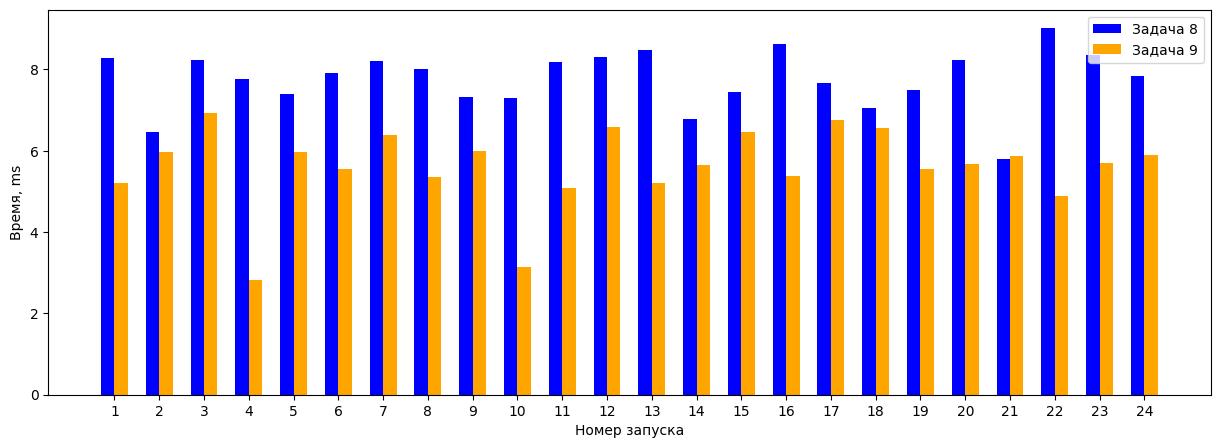

In [66]:
import matplotlib.pyplot as plt

num_of_run = np.arange(1, min(len(execution_times_task8), len(execution_times_task9)) + 1) 

width = 0.3  
plt.figure(figsize=(15, 5)) 

plt.bar(num_of_run - width / 2, execution_times_task8[:num_of_run[-1]], width, label='Задача 8', color='blue')
plt.bar(num_of_run + width / 2, execution_times_task9[:num_of_run[-1]], width, label='Задача 9', color='orange')

plt.xlabel('Номер запуска')
plt.ylabel('Время, ms')
plt.xticks(num_of_run)
plt.legend()

plt.show()

**А победителем является**: чистый Python

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

## Анекдот:
Два мужика. Один другому говорит:   
– Спорим на 100 рублей, я свой глаз укушу.   
Второй думает “ну как это можно? ”   
– Спорим.   
Мужик достает у себя стеклянный глаз и кусает.   
– А спорим на 100 рублей, я второй глаз укушу.   
Второй думает “он же не слепой вроде”   
– Спорим.   
Мужик достает у себя вставные челюсти и кусает второй глаз. И снова:    
– А спорим на десятку, я тебя обоссу и духами пахнуть будет.   
Второй думает “быть такого не может”   
– Спорим.    
Мужик обоссал приятеля. Духами не запахло.    
Второй говорит:    
– Вот видишь!    
Первый:    
– Я иногда и проигрываю.    